⊕ [postagging.pdf](https://web.stanford.edu/class/cs124/lec/postagging.pdf)

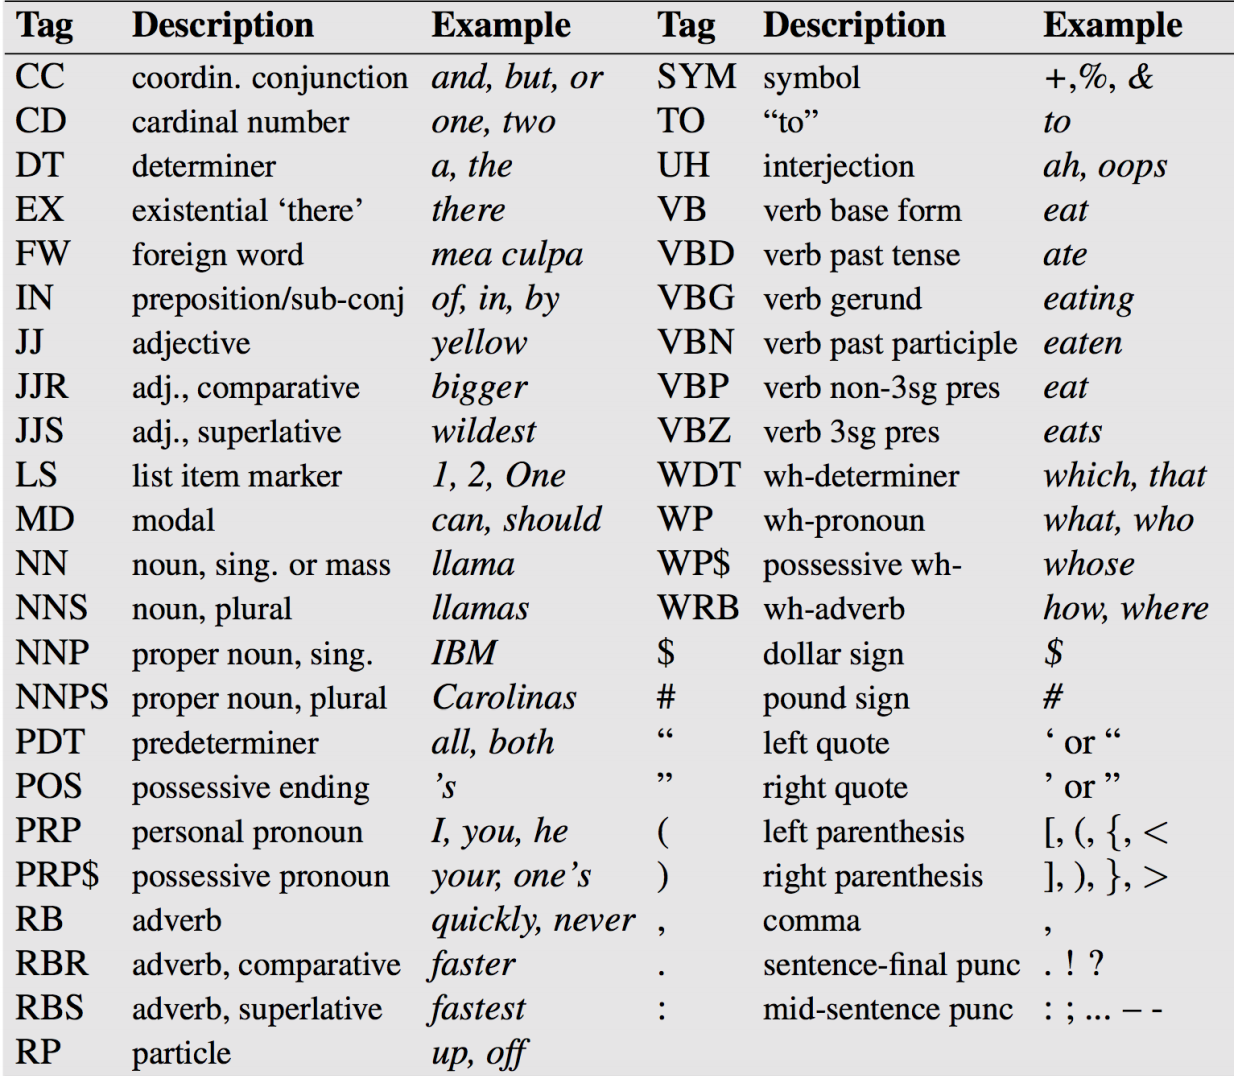

⊕ [POS tags](https://universaldependencies.org/en/pos/)
⊕ [ADV](https://universaldependencies.org/en/pos/ADV.html)


In [1]:
import stanfordnlp.server as corenlp

TEXT='جارك رجل طيب'
host='pc'
external_server_client=corenlp.CoreNLPClient(start_server=False, 
                                             endpoint=f"http://{host}:9001")
output_format='json'  # output type from server: serialized, json, text, conll, conllu, or xml
ann = external_server_client.annotate(TEXT, annotators='tokenize,ssplit,pos,depparse,lemma,natlog,ner,openie', 
                                      properties_key='arabic',
                                      output_format=output_format)
# print(ann.strip())
print(', '.join(ann['sentences'][0].keys()))
ann

index, basicDependencies, enhancedDependencies, enhancedPlusPlusDependencies, openie, entitymentions, tokens


{'sentences': [{'index': 0,
   'basicDependencies': [{'dep': 'ROOT',
     'governor': 0,
     'governorGloss': 'ROOT',
     'dependent': 1,
     'dependentGloss': 'جارك'},
    {'dep': 'nmod:npmod',
     'governor': 3,
     'governorGloss': 'طيب',
     'dependent': 2,
     'dependentGloss': 'رجل'},
    {'dep': 'xcomp',
     'governor': 1,
     'governorGloss': 'جارك',
     'dependent': 3,
     'dependentGloss': 'طيب'}],
   'enhancedDependencies': [{'dep': 'ROOT',
     'governor': 0,
     'governorGloss': 'ROOT',
     'dependent': 1,
     'dependentGloss': 'جارك'},
    {'dep': 'nmod:npmod',
     'governor': 3,
     'governorGloss': 'طيب',
     'dependent': 2,
     'dependentGloss': 'رجل'},
    {'dep': 'xcomp',
     'governor': 1,
     'governorGloss': 'جارك',
     'dependent': 3,
     'dependentGloss': 'طيب'}],
   'enhancedPlusPlusDependencies': [{'dep': 'ROOT',
     'governor': 0,
     'governorGloss': 'ROOT',
     'dependent': 1,
     'dependentGloss': 'جارك'},
    {'dep': 'nmod:npmod'

In [2]:
import sagas
tokens=ann['sentences'][0]['tokens']
sagas.dict_df(tokens)

,index,word,originalText,lemma,characterOffsetBegin,characterOffsetEnd,pos,ner
0,1,جارك,جارك,جارك,0,4,VBD,O
1,2,رجل,رجل,رجل,5,8,NN,O
2,3,طيب,طيب,طيب,9,12,JJ,O


In [9]:
sagas.dict_df(ann['sentences'][0]['enhancedPlusPlusDependencies'])

,dep,governor,governorGloss,dependent,dependentGloss
0,ROOT,0,ROOT,1,جارك
1,nmod:npmod,3,طيب,2,رجل
2,xcomp,1,جارك,3,طيب


In [21]:
def display_result(ann):
    tokens=ann['sentences'][0]['tokens']
    display(sagas.dict_df(tokens))
    display(sagas.dict_df(ann['sentences'][0]['enhancedPlusPlusDependencies']))

In [17]:
host='pc'
def invoke_server(text, language, output_format='json', port=9001):
    external_server_client=corenlp.CoreNLPClient(start_server=False, 
                                                 endpoint=f"http://{host}:{port}")
    # output_format='json'  # output type from server: serialized, json, text, conll, conllu, or xml
    ann = external_server_client.annotate(text, annotators='tokenize,ssplit,pos,depparse,lemma,natlog,ner,openie', 
                                          properties_key=language,
                                          output_format=output_format)
    return ann

r=invoke_server('جارك رجل طيب', 'arabic', 'text', port=9001)
print(r.strip())

Sentence #1 (3 tokens):
جارك رجل طيب

Tokens:
[Text=جارك CharacterOffsetBegin=0 CharacterOffsetEnd=4 PartOfSpeech=VBD Lemma=جارك NamedEntityTag=O]
[Text=رجل CharacterOffsetBegin=5 CharacterOffsetEnd=8 PartOfSpeech=NN Lemma=رجل NamedEntityTag=O]
[Text=طيب CharacterOffsetBegin=9 CharacterOffsetEnd=12 PartOfSpeech=JJ Lemma=طيب NamedEntityTag=O]

Dependency Parse (enhanced plus plus dependencies):
root(ROOT-0, جارك-1)
nmod:npmod(طيب-3, رجل-2)
xcomp(جارك-1, طيب-3)

Extracted the following NER entity mentions:


In [11]:
sents="جارَك عُمَر مُتَرْجِم يا رَواد."
r=invoke_server(sents, 'arabic', 'text', port=9001)
print(r.strip())

Sentence #1 (6 tokens):
جارَك عُمَر مُتَرْجِم يا رَواد.

Tokens:
[Text=جارك CharacterOffsetBegin=0 CharacterOffsetEnd=5 PartOfSpeech=NNP Lemma=جارك NamedEntityTag=O]
[Text=عمر CharacterOffsetBegin=6 CharacterOffsetEnd=11 PartOfSpeech=NNP Lemma=عمر NamedEntityTag=O]
[Text=مترجم CharacterOffsetBegin=12 CharacterOffsetEnd=21 PartOfSpeech=NN Lemma=مترجم NamedEntityTag=O]
[Text=يا CharacterOffsetBegin=22 CharacterOffsetEnd=24 PartOfSpeech=RP Lemma=يا NamedEntityTag=O]
[Text=رواد CharacterOffsetBegin=25 CharacterOffsetEnd=30 PartOfSpeech=NN Lemma=رواد NamedEntityTag=O]
[Text=. CharacterOffsetBegin=30 CharacterOffsetEnd=31 PartOfSpeech=PUNC Lemma=. NamedEntityTag=O]

Dependency Parse (enhanced plus plus dependencies):
root(ROOT-0, مترجم-3)
compound(مترجم-3, جارك-1)
compound(مترجم-3, عمر-2)
amod(رواد-5, يا-4)
dep(مترجم-3, رواد-5)
punct(مترجم-3, .-6)

Extracted the following NER entity mentions:


In [18]:
r=invoke_server('Joe Smith lives in California.', 'english', 'text', port=9001)
print(r.strip())

Sentence #1 (6 tokens):
Joe Smith lives in California.

Tokens:
[Text=Joe CharacterOffsetBegin=0 CharacterOffsetEnd=3 PartOfSpeech=NNP Lemma=Joe NamedEntityTag=PERSON]
[Text=Smith CharacterOffsetBegin=4 CharacterOffsetEnd=9 PartOfSpeech=NNP Lemma=Smith NamedEntityTag=PERSON]
[Text=lives CharacterOffsetBegin=10 CharacterOffsetEnd=15 PartOfSpeech=VBZ Lemma=live NamedEntityTag=O]
[Text=in CharacterOffsetBegin=16 CharacterOffsetEnd=18 PartOfSpeech=IN Lemma=in NamedEntityTag=O]
[Text=California CharacterOffsetBegin=19 CharacterOffsetEnd=29 PartOfSpeech=NNP Lemma=California NamedEntityTag=STATE_OR_PROVINCE]
[Text=. CharacterOffsetBegin=29 CharacterOffsetEnd=30 PartOfSpeech=. Lemma=. NamedEntityTag=O]

Dependency Parse (enhanced plus plus dependencies):
root(ROOT-0, lives-3)
compound(Smith-2, Joe-1)
nsubj(lives-3, Smith-2)
case(California-5, in-4)
nmod:in(lives-3, California-5)
punct(lives-3, .-6)

Extracted the following NER entity mentions:
Joe Smith	PERSON
California	STATE_OR_PROVINCE

Ext

In [22]:
r=invoke_server('Joe Smith lives in California.', 'english', 'json',  port=9001)
display_result(r)

,index,word,originalText,lemma,characterOffsetBegin,characterOffsetEnd,pos,ner,before,after
0,1,Joe,Joe,Joe,0,3,NNP,PERSON,,
1,2,Smith,Smith,Smith,4,9,NNP,PERSON,,
2,3,lives,lives,live,10,15,VBZ,O,,
3,4,in,in,in,16,18,IN,O,,
4,5,California,California,California,19,29,NNP,STATE_OR_PROVINCE,,
5,6,.,.,.,29,30,.,O,,


,dep,governor,governorGloss,dependent,dependentGloss
0,ROOT,0,ROOT,3,lives
1,compound,2,Smith,1,Joe
2,nsubj,3,lives,2,Smith
3,case,5,California,4,in
4,nmod:in,3,lives,5,California
5,punct,3,lives,6,.


In [29]:
{1:'5'}

{1: '5'}

,index,word,originalText,lemma,characterOffsetBegin,characterOffsetEnd,pos,ner,before,after
0,1,Joe,Joe,Joe,0,3,NNP,PERSON,,
1,2,Smith,Smith,Smith,4,9,NNP,PERSON,,
2,3,lives,lives,live,10,15,VBZ,O,,
3,4,in,in,in,16,18,IN,O,,
4,5,California,California,California,19,29,NNP,STATE_OR_PROVINCE,,
5,6,.,.,.,29,30,.,O,,


,dep,governor,governorGloss,dependent,dependentGloss
0,ROOT,0,ROOT,3,lives
1,compound,2,Smith,1,Joe
2,nsubj,3,lives,2,Smith
3,case,5,California,4,in
4,nmod:in,3,lives,5,California
5,punct,3,lives,6,.


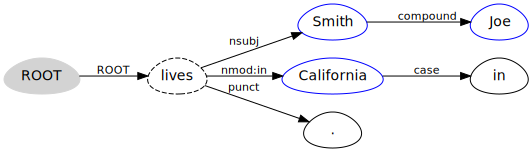

In [43]:
class BasicViz(object):
    def __init__(self, shape='egg', size='8,5', fontsize=0):
        from graphviz import Digraph
        self.f = Digraph('deps', filename='deps.gv')
        self.f.attr(rankdir='LR', size=size)
        # font 'Calibri' support Arabic text
        self.f.attr('node', shape=shape, fontname='Calibri')
        if fontsize != 0:
            self.f.attr(fontsize=str(fontsize))
    
    def default_node(self):
        self.f.attr('node', style='solid', color='black')
    def add_nodes(self, nodes):
        for k,v in nodes.items():
            self.f.attr('node', style=v['style'], color=v['color'])
            self.f.node(v['word'])
            self.default_node()
    
    def add_edges(self, edges):        
        for edge in edges:
            # print(edge)
            head_node=edge[1]
            rel=edge[2]
            node=edge[0]
            self.f.edge(head_node, node, label=rel, fontsize='11', fontname='Calibri')
        return self.f

def show_deps(sents, language='english'):
    ann=invoke_server(sents, language, 'json',  port=9001)
    display_result(ann)
    viz=BasicViz()
    tokens=ann['sentences'][0]['tokens']
    nodes={t['index']:{'word':t['word'], 
                       'style':'dashed' if t['pos'].startswith('V') else 'solid',
                       'color':'black' if t['ner']=='O' else 'blue',
                      } for t in tokens}
    nodes[0]={'word':'ROOT', 'style':'filled', 'color':'lightgrey'}
    viz.add_nodes(nodes)
    deps=ann['sentences'][0]['enhancedPlusPlusDependencies']
    viz.add_edges([(t['dependentGloss'], t['governorGloss'], t['dep']) for t in deps])
    return viz.f

show_deps('Joe Smith lives in California.', language='english')

,index,word,originalText,lemma,characterOffsetBegin,characterOffsetEnd,pos,ner
0,1,جارك,جارَك,جارك,0,5,NNP,O
1,2,عمر,عُمَر,عمر,6,11,NNP,O
2,3,مترجم,مُتَرْجِم,مترجم,12,21,NN,O
3,4,يا,يا,يا,22,24,RP,O
4,5,رواد,رَواد,رواد,25,30,NN,O
5,6,.,.,.,30,31,PUNC,O


,dep,governor,governorGloss,dependent,dependentGloss
0,ROOT,0,ROOT,3,مترجم
1,compound,3,مترجم,1,جارك
2,compound,3,مترجم,2,عمر
3,amod,5,رواد,4,يا
4,dep,3,مترجم,5,رواد
5,punct,3,مترجم,6,.


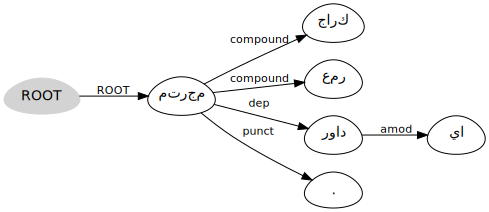

In [44]:
show_deps(sents="جارَك عُمَر مُتَرْجِم يا رَواد.", language='arabic')

In [13]:
def test_tokensregex(corenlp_client, props, text):
    pattern = '([ner: PERSON]+) /wrote/ /an?/ []{0,3} /sentence|article/'
    matches = corenlp_client.tokensregex(text, pattern, 
                                         annotators=props['annotators'], 
                                         properties=props)
    print(matches)
    assert len(matches["sentences"]) == 1
    assert matches["sentences"][0]["length"] == 1
    assert matches == {
        "sentences": [{
            "0": {
                "text": "Chris wrote a simple sentence",
                "begin": 0,
                "end": 5,
                "1": {
                    "text": "Chris",
                    "begin": 0,
                    "end": 1
                }},
            "length": 1
        },]}


def test_semgrex(corenlp_client, props, text):
    pattern = '{word:wrote} >nsubj {}=subject >dobj {}=object'
    matches = corenlp_client.semgrex(text, pattern, to_words=True, 
                                     annotators=props['annotators'], 
                                     properties=props)
    print(matches)
    assert matches == [
        {
            "text": "wrote",
            "begin": 1,
            "end": 2,
            "$subject": {
                "text": "Chris",
                "begin": 0,
                "end": 1
            },
            "$object": {
                "text": "sentence",
                "begin": 4,
                "end": 5
            },
            "sentence": 0,}]
    
sc=corenlp.CoreNLPClient(start_server=False, endpoint="http://localhost:9001")
properties_key='english'
props = {'pipelineLanguage': properties_key.lower(),
          'annotators': 'tokenize,ssplit,pos,depparse,lemma,natlog,ner,openie',
          'outputFormat': 'text'
         }
test_tokensregex(sc, props,  "Chris wrote a simple sentence that he parsed with Stanford CoreNLP.\n")
test_semgrex(sc, props,  "Chris wrote a simple sentence that he parsed with Stanford CoreNLP.")

{'sentences': [{'0': {'text': 'Chris wrote a simple sentence', 'begin': 0, 'end': 5, '1': {'text': 'Chris', 'begin': 0, 'end': 1}}, 'length': 1}]}
[{'text': 'wrote', 'begin': 1, 'end': 2, '$subject': {'text': 'Chris', 'begin': 0, 'end': 1}, '$object': {'text': 'sentence', 'begin': 4, 'end': 5}, 'sentence': 0}]
